In [1]:
!pip install transformers diffusers torch accelerate sentencepiece

In [2]:
import torch
from transformers import pipeline, set_seed, AutoTokenizer, AutoModelForCausalLM
from diffusers import StableDiffusionPipeline
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [3]:
class TextGenerator:
    def __init__(self, model_name="EleutherAI/gpt-neo-1.3B"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
        self.model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
            low_cpu_mem_usage=True,
        )
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def generate_text(self, prompt, max_length=150, temperature=0.8, top_k=50, top_p=0.95):
        inputs = self.tokenizer(prompt, return_tensors="pt").to(self.device)
        outputs = self.model.generate(
            inputs["input_ids"],
            max_length=max_length,
            temperature=temperature,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            pad_token_id=self.tokenizer.eos_token_id,
        )
        return self.tokenizer.decode(outputs[0], skip_special_tokens=True)

In [4]:
# use "stable-diffusion-v1-5/stable-diffusion-v1-5" if in case runwayml doesn't work
class ImageGenerator:
    def __init__(self, model_name="runwayml/stable-diffusion-v1-5"):
        self.pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float32)
        self.pipe = self.pipe.to("cpu")

    def generate_image(self, prompt):
        """Generates an image based on the given prompt."""
        image = self.pipe(prompt).images[0]
        return image
    

In [5]:
class StoryGenerator:
    def __init__(self):
        self.text_gen = TextGenerator()
        self.image_gen = ImageGenerator()

    def generate_story(self, prompt):
        """
        Generates a balanced story and an image based on the given prompt.
        """
        story = self.text_gen.generate_text(prompt, max_length=300, temperature=0.8)
        image = self.image_gen.generate_image(prompt)
        return story, image

In [6]:
def display_story(story, image):
    """Displays the story and image."""
    print("Generated Story:")
    print(story)
    print("\nGenerated Image:")
    display(image)


# Initialize the story generator
story_gen = StoryGenerator()

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


  0%|          | 0/50 [00:00<?, ?it/s]

Generated Story:
Once upon a time in a mystical forest, a young girl discovered a magical pendant. The pendant had been used by her parents to protect her from evil magic. But the pendant had been buried, and she had no idea what to do next.

When she found the pendant again, she began to feel ill. Her parents tried to keep her from going further, but they were unable to stop her from losing her magic and becoming weaker. The pendant was cursed. The only way to escape the curse was to return it to the girl’s family, but the curse was so powerful that it would not allow her to do so.

A man was traveling with his daughter, and they were able to find a way out. The man knew a spell that would allow him to transfer the curse from the girl’s pendant to his own, so he could have complete control over the magic in the land.

The young girl had been born in the forest, but it was not a forest she knew. She had no real idea of what it was, and was not allowed to go near it. She was an only chi

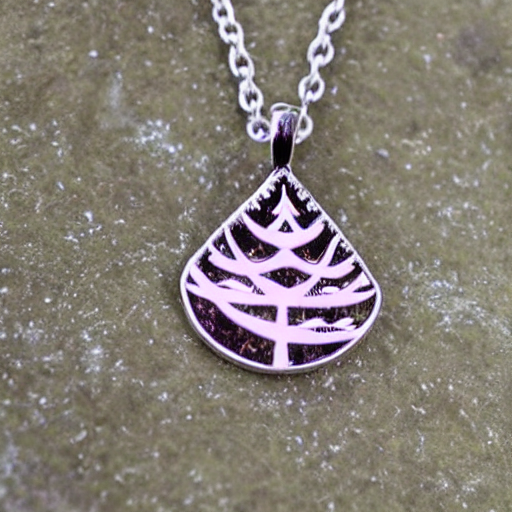

In [7]:
# Get user input
# user_prompt = input("Enter a prompt for your story: ")
user_prompt = "Once upon a time in a mystical forest, a young girl discovered a magical pendant."

# Generate story and image
generated_story, generated_image = story_gen.generate_story(user_prompt)

# Display the results
display_story(generated_story, generated_image)